In [4]:
import sys
import os
sys.path.append(os.path.abspath('../'))

import numpy as np
from random import randint
import random

from ortc.utils import *
from ortc.glop_v2 import glop_v2
from ortc.ortc_v2 import ortc_v2
from ortc.ortc_v1 import ortc_v1
from otc.exactOTC import exact_otc

In [5]:
n = 15

In [3]:
A1 = stochastic_block_model([n], np.array([[1.0]]))

# Random permutation
perm = np.random.permutation(n)
A2 = A1[np.ix_(perm, perm)]

cost_list = []

# Find all the edges in the upper triangular part of the matrix (since it's symmetric)
edges1 = [(i, j) for i in range(n) for j in range(i+1, n) if A1[i, j] == 1]
edges2 = [(i, j) for i in range(n) for j in range(i+1, n) if A2[i, j] == 1]


# Run algorithm
for i in range(n):
    print(i)
    # Get cost function
    c = get_degree_cost(A1, A2)
    _, cost, _ = glop_v2(A1, A2, c, vertex=True)
    cost_list.append(cost)
    
    edge_to_remove1 = random.choice(edges1)
    i, j = edge_to_remove1
    A1[i, j] = 0
    A1[j, i] = 0
    
    edge_to_remove2 = random.choice(edges2)
    i, j = edge_to_remove2
    A2[i, j] = 0
    A2[j, i] = 0

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [4]:
cost_list

[0.0,
 2.1682742669743273e-17,
 6.897878557258114e-13,
 1.3848114639665111e-05,
 2.272423103765701e-05,
 2.846289579452047e-05,
 3.5320375471873666e-05,
 3.8473876710461826e-05,
 3.998548714656998e-05,
 4.248481064229121e-05,
 5.094416070330053e-05,
 5.730147006266237e-05,
 6.467330774194083e-05,
 6.617022062495744e-05,
 6.386753423979066e-05]

In [16]:
cost_list

[0.0,
 1.3548104682476568e-18,
 2.5804984543005276e-18,
 6.54076747608988e-17,
 1.655757085270119e-16,
 3.43072558097693e-16,
 0.0002832223865877705,
 0.0003945228481772061,
 0.00043579740555109816,
 0.00045146497849200736]

In [5]:
cost_list

[0.0,
 2.1682742669743273e-17,
 6.897878557258114e-13,
 1.3848114639665111e-05,
 2.272423103765701e-05,
 2.846289579452047e-05,
 3.5320375471873666e-05,
 3.8473876710461826e-05,
 3.998548714656998e-05,
 4.248481064229121e-05,
 5.094416070330053e-05,
 5.730147006266237e-05,
 6.467330774194083e-05,
 6.617022062495744e-05,
 6.386753423979066e-05]

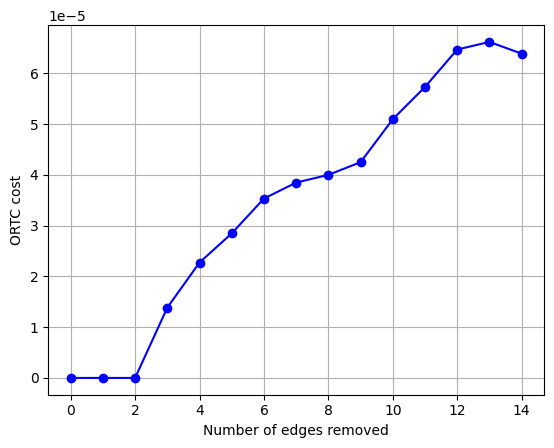

In [10]:
import matplotlib.pyplot as plt

# Data list
cost = [
    0.0, 2.1682742669743273e-17, 6.897878557258114e-13, 1.3848114639665111e-05,
    2.272423103765701e-05, 2.846289579452047e-05, 3.5320375471873666e-05,
    3.8473876710461826e-05, 3.998548714656998e-05, 4.248481064229121e-05,
    5.094416070330053e-05, 5.730147006266237e-05, 6.467330774194083e-05,
    6.617022062495744e-05, 6.386753423979066e-05
]

# Plotting the data
plt.plot(cost, marker='o', linestyle='-', color='b')#, label='Data')

# Labeling the plot
plt.xlabel('Number of edges removed')
plt.ylabel('ORTC cost')
plt.grid(True)

# Display the plot
plt.show()


In [2]:
def independent_weight_couplings(A1, A2):
    dx = A1.shape[0]
    dy = A2.shape[0]
    w = np.zeros((dx,dy,dx,dy))
    for i in range(dx):
        for j in range(dy):
            for k in range(dx):
                w[i,j,k,:] = A1[i,k]*A2[j,:]
    return w

In [14]:
A1 = stochastic_block_model([n], np.array([[1.0]]))

# Random permutation
perm = np.random.permutation(n)
A2 = A1[np.ix_(perm, perm)]

ortc_cost_list = []
independent_cost_list = []

# Find all the edges in the upper triangular part of the matrix (since it's symmetric)
edges1 = [(i, j) for i in range(n) for j in range(i+1, n) if A1[i, j] == 1]
edges2 = [(i, j) for i in range(n) for j in range(i+1, n) if A2[i, j] == 1]


# Run algorithm
for i in range(2):
    print(i)
    # Get cost function
    w_indep = independent_weight_couplings(A1,A2)
    c = get_degree_cost(A1, A2)
    d = np.sum(w_indep, axis=(2, 3))
    cost_indep = np.sum(d * c)
    independent_cost_list.append(cost_indep)
    _, cost, _ = glop_v2(A1, A2, c, vertex=True)
    ortc_cost_list.append(cost)
    
    edge_to_remove1 = random.choice(edges1)
    i, j = edge_to_remove1
    A1[i, j] = 0
    A1[j, i] = 0
    
    edge_to_remove2 = random.choice(edges2)
    i, j = edge_to_remove2
    A2[i, j] = 0
    A2[j, i] = 0

0
1


In [15]:
independent_cost_list

[0.0, 4.8662851383939775e-06]

In [16]:
ortc_cost_list

[0.0, 1.2392393979826913e-17]

In [17]:
for i in range(2):
    print(i)
    # Get cost function
    w_indep = independent_weight_couplings(A1,A2)
    c = get_degree_cost(A1, A2)
    d = np.sum(w_indep, axis=(2, 3))
    cost_indep = np.sum(d * c)
    independent_cost_list.append(cost_indep)
    _, cost, _ = glop_v2(A1, A2, c, vertex=True)
    ortc_cost_list.append(cost)
    
    edge_to_remove1 = random.choice(edges1)
    i, j = edge_to_remove1
    A1[i, j] = 0
    A1[j, i] = 0
    
    edge_to_remove2 = random.choice(edges2)
    i, j = edge_to_remove2
    A2[i, j] = 0
    A2[j, i] = 0

0
1


In [31]:
independent_cost_list

[0.0,
 4.8662851383939775e-06,
 1.108894736813311e-05,
 1.8231754223229924e-05,
 2.228084206219445e-05,
 2.495665954621877e-05,
 3.3382500000000035e-05,
 3.3155392306907504e-05,
 3.8522434716908915e-05,
 5.024235571789118e-05,
 5.604441882753543e-05,
 6.333260043555065e-05,
 6.492419808928871e-05,
 6.896328502966449e-05,
 6.78177488377552e-05,
 7.859510185541602e-05,
 7.754235876845857e-05,
 7.70355892698283e-05,
 8.921378015226943e-05]

In [32]:
ortc_cost_list

[0.0,
 1.2392393979826913e-17,
 1.1305311974146269e-05,
 1.859099197945424e-05,
 2.272423150945786e-05,
 2.54582884030961e-05,
 3.371969704386267e-05,
 3.3832032966237234e-05,
 3.9316711721490344e-05,
 5.1289071462016944e-05,
 5.7224301329732243e-05,
 6.468010257247345e-05,
 6.632041740302888e-05,
 7.046248687801049e-05,
 6.930824881221955e-05,
 8.03416596744339e-05,
 7.928488368461505e-05,
 7.878639811690115e-05,
 9.022757310854938e-05]

In [22]:
for i in range(5):
    print(i)
    # Get cost function
    w_indep = independent_weight_couplings(A1,A2)
    c = get_degree_cost(A1, A2)
    d = np.sum(w_indep, axis=(2, 3))
    cost_indep = np.sum(d * c)
    independent_cost_list.append(cost_indep)
    _, cost, _ = glop_v2(A1, A2, c, vertex=True)
    ortc_cost_list.append(cost)
    
    edge_to_remove1 = random.choice(edges1)
    i, j = edge_to_remove1
    A1[i, j] = 0
    A1[j, i] = 0
    
    edge_to_remove2 = random.choice(edges2)
    i, j = edge_to_remove2
    A2[i, j] = 0
    A2[j, i] = 0

0
1
2
3
4


In [30]:
for i in range(5):
    print(i)
    # Get cost function
    w_indep = independent_weight_couplings(A1,A2)
    c = get_degree_cost(A1, A2)
    d = np.sum(w_indep, axis=(2, 3))
    cost_indep = np.sum(d * c)
    independent_cost_list.append(cost_indep)
    _, cost, _ = glop_v2(A1, A2, c, vertex=True)
    ortc_cost_list.append(cost)
    
    edge_to_remove1 = random.choice(edges1)
    i, j = edge_to_remove1
    A1[i, j] = 0
    A1[j, i] = 0
    
    edge_to_remove2 = random.choice(edges2)
    i, j = edge_to_remove2
    A2[i, j] = 0
    A2[j, i] = 0

0
1
2
3
4


In [28]:
A1

array([[0.        , 0.00543478, 0.00543478, 0.        , 0.00543478,
        0.00543478, 0.00543478, 0.00543478, 0.00543478, 0.        ,
        0.00543478, 0.        , 0.00543478, 0.00543478, 0.00543478],
       [0.00543478, 0.        , 0.00543478, 0.00543478, 0.00543478,
        0.00543478, 0.00543478, 0.00543478, 0.00543478, 0.        ,
        0.00543478, 0.00543478, 0.00543478, 0.00543478, 0.00543478],
       [0.00543478, 0.00543478, 0.        , 0.        , 0.00543478,
        0.00543478, 0.00543478, 0.00543478, 0.00543478, 0.00543478,
        0.00543478, 0.00543478, 0.00543478, 0.00543478, 0.00543478],
       [0.        , 0.00543478, 0.        , 0.        , 0.00543478,
        0.00543478, 0.00543478, 0.00543478, 0.00543478, 0.00543478,
        0.00543478, 0.00543478, 0.00543478, 0.00543478, 0.00543478],
       [0.00543478, 0.00543478, 0.00543478, 0.00543478, 0.        ,
        0.00543478, 0.00543478, 0.        , 0.00543478, 0.00543478,
        0.        , 0.00543478, 0.00543478, 

In [29]:
A2

array([[0.        , 0.00537634, 0.        , 0.00537634, 0.00537634,
        0.00537634, 0.00537634, 0.        , 0.00537634, 0.00537634,
        0.00537634, 0.00537634, 0.00537634, 0.        , 0.00537634],
       [0.00537634, 0.        , 0.00537634, 0.00537634, 0.00537634,
        0.00537634, 0.00537634, 0.00537634, 0.00537634, 0.00537634,
        0.00537634, 0.00537634, 0.00537634, 0.        , 0.00537634],
       [0.        , 0.00537634, 0.        , 0.00537634, 0.00537634,
        0.00537634, 0.        , 0.00537634, 0.00537634, 0.00537634,
        0.00537634, 0.        , 0.00537634, 0.00537634, 0.00537634],
       [0.00537634, 0.00537634, 0.00537634, 0.        , 0.00537634,
        0.00537634, 0.00537634, 0.00537634, 0.00537634, 0.00537634,
        0.00537634, 0.        , 0.00537634, 0.00537634, 0.00537634],
       [0.00537634, 0.00537634, 0.00537634, 0.00537634, 0.        ,
        0.00537634, 0.00537634, 0.00537634, 0.00537634, 0.00537634,
        0.00537634, 0.00537634, 0.00537634, 

In [8]:
cost_list

[0.0,
 9464.0,
 25488.0,
 38824.0,
 39792.0,
 42752.0,
 47868.0,
 45288.0,
 58976.0,
 65200.0,
 63812.0,
 76040.0,
 87988.0,
 95984.0,
 104936.0]

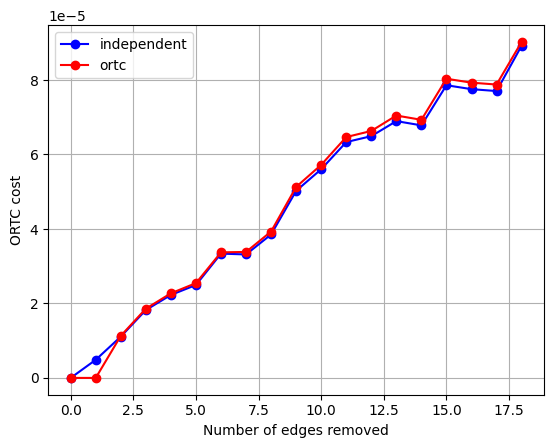

In [37]:
import matplotlib.pyplot as plt

# Data list

# Plotting the data
plt.plot(independent_cost_list, marker='o', linestyle='-', color='b', label='independent')
plt.plot(ortc_cost_list, marker='o', linestyle='-', color='r', label='ortc')

# Labeling the plot
plt.xlabel('Number of edges removed')
plt.ylabel('ORTC cost')
plt.grid(True)
plt.legend()
# Display the plot
plt.show()


In [5]:
independent_cost_list = [0.0, 5.056166789940821e-06, 8.89375534963604e-06, 1.9654811438714078e-05, 2.3899581167287684e-05, 2.9780000000000027e-05, 3.682088998058611e-05, 3.6693590984320233e-05, 4.357597798631163e-05, 3.963046603732634e-05, 5.337896424981391e-05, 5.1922639284663924e-05, 6.151558803528078e-05, 6.817731731438899e-05, 7.766755658329916e-05, 7.067934177851111e-05, 8.63025033812448e-05, 8.389614371497003e-05, 9.627088393678579e-05, 0.00010866846197073242]
ortc_cost_list = [0.0, 2.154164454677895e-12, 6.219822549780119e-17, 1.9654811438648897e-05, 2.389958116729101e-05, 2.992638734084567e-16, 3.6820889980470616e-05, 3.66935909842959e-05, 4.357597798631341e-05, 3.9630466037331615e-05, 5.3378964249816125e-05, 5.192263928465315e-05, 6.151558803523964e-05, 6.817731731438685e-05, 7.766755658329794e-05, 7.067934177852874e-05, 8.630250338125834e-05, 8.389614371493966e-05, 9.627088393679103e-05, 0.00010866846197073442]

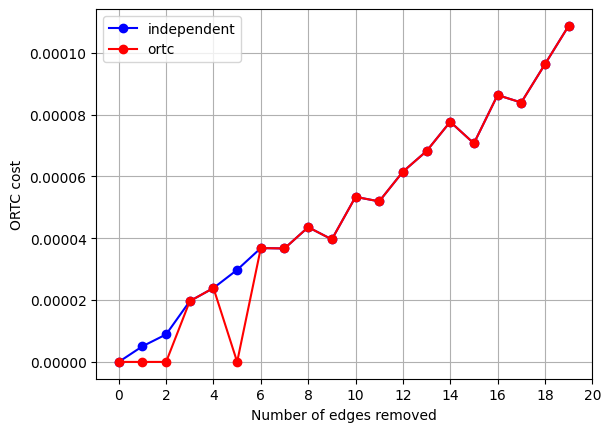

In [6]:
import matplotlib.pyplot as plt

plt.plot(independent_cost_list, marker='o', linestyle='-', color='b', label='independent')
plt.plot(ortc_cost_list, marker='o', linestyle='-', color='r', label='ortc')

# Labeling the plot
plt.xlabel('Number of edges removed')
plt.ylabel('ORTC cost')
plt.xticks(np.arange(0, 21, 2))
plt.grid(True)
plt.legend()
# Display the plot
plt.show()

In [7]:
independent_cost_list = [0.0, 5.056166789940822e-06, 8.893755349636035e-06, 1.689251361489481e-05, 2.3899581167287684e-05, 2.903500000000003e-05, 3.359632942885115e-05, 3.1902553563761284e-05, 3.754357391614751e-05, 5.027744466159026e-05, 4.8340458738695876e-05, 5.957459264242282e-05, 6.914599090891473e-05, 6.899970039904728e-05, 6.415743147895868e-05, 7.159266057652396e-05, 8.865928325513305e-05, 9.026576070237098e-05, 0.00010214311555986219, 0.00011018435854124627]
ortc_cost_list = [0.0, 1.8245528130104785e-17, 1.8491597508780772e-17, 1.6892513614895972e-05, 1.1426719538540245e-16, 2.9035000187363426e-05, 3.359632942880018e-05, 3.190255376103817e-05, 3.7543573916207435e-05, 5.027744466158699e-05, 4.834045873867997e-05, 5.957459264241639e-05, 6.914599090891165e-05, 6.899970039909284e-05, 6.415743147895574e-05, 7.159266057651108e-05, 8.865928325520314e-05, 9.026576070243392e-05, 0.00010214311555985274, 0.00011018435854124792]

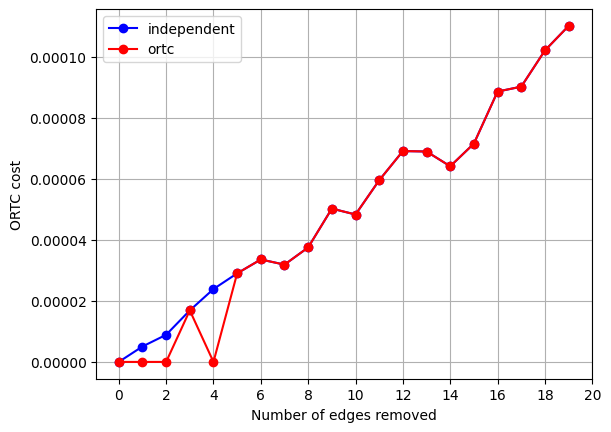

In [8]:
import matplotlib.pyplot as plt

plt.plot(independent_cost_list, marker='o', linestyle='-', color='b', label='independent')
plt.plot(ortc_cost_list, marker='o', linestyle='-', color='r', label='ortc')

# Labeling the plot
plt.xlabel('Number of edges removed')
plt.ylabel('ORTC cost')
plt.xticks(np.arange(0, 21, 2))
plt.grid(True)
plt.legend()
# Display the plot
plt.show()

In [9]:
independent_cost_list = [0.0, 5.056166789940835e-06, 1.4153598673296919e-05, 1.688789438776467e-05, 2.0990213174365937e-05, 2.0590000000000045e-05, 2.4695605387742594e-05, 3.3294731249179356e-05, 4.71256510035363e-05, 4.627086498119206e-05, 5.113527367039848e-05, 5.0233816513825294e-05, 5.733558552967456e-05, 7.02756766342315e-05, 7.333860368989877e-05, 7.959537884389019e-05, 7.324020489700965e-05, 8.600919596808923e-05, 8.192330163820624e-05, 9.098161496322939e-05]
ortc_cost_list = [0.0, 2.364127310226108e-17, 6.95479387436662e-16, 2.0381846817142344e-16, 2.0990213174374597e-05, 2.0589999999997883e-05, 2.469560538774604e-05, 3.3294731249002075e-05, 4.712565100353538e-05, 4.627086498119218e-05, 5.1135273670270504e-05, 5.0233816513830356e-05, 5.733558552964115e-05, 7.027567663425762e-05, 7.333860368989714e-05, 7.959537952728315e-05, 7.324020489701211e-05, 8.600919596808342e-05, 8.192330163819949e-05, 9.098161496323383e-05]

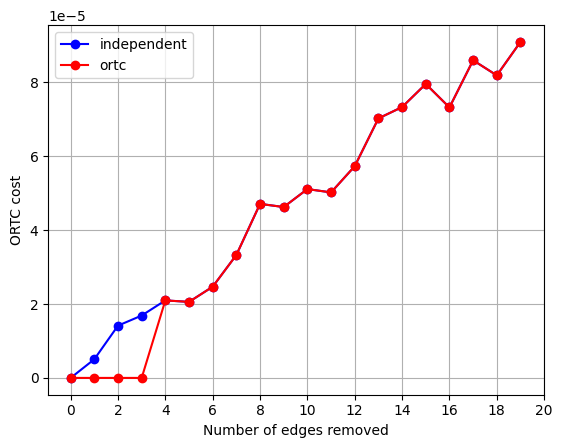

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(independent_cost_list, marker='o', linestyle='-', color='b', label='independent')
plt.plot(ortc_cost_list, marker='o', linestyle='-', color='r', label='ortc')

# Labeling the plot
plt.xlabel('Number of edges removed')
plt.ylabel('ORTC cost')
plt.xticks(np.arange(0, 21, 2))
plt.grid(True)
plt.legend()
# Display the plot
plt.show()

In [1]:
independent_cost_list = [0.0, 5.056166789940838e-06, 1.1525898229086271e-05, 1.4120977336815246e-05, 1.8076040279721793e-05, 2.3660000000000055e-05, 3.1144726491212524e-05, 3.0692733365817926e-05, 3.809191672978785e-05, 3.756417168511279e-05, 4.500886273125587e-05, 4.3733647752793586e-05, 5.2335933165930466e-05, 5.1410332117166475e-05, 5.141033211716649e-05, 6.343423221195842e-05, 6.340015541802756e-05, 6.952747716478692e-05, 7.796980028175921e-05, 7.260352989891386e-05]
ortc_cost_list = [0.0, 7.396839955799686e-12, 1.1525898229086615e-05, 1.4120977336816129e-05, 3.8086218854947855e-16, 2.3660000000072195e-05, 3.114472649121371e-05, 3.069273339197478e-05, 3.809191672978731e-05, 3.7564171685116266e-05, 4.500886273125561e-05, 4.3733647752791695e-05, 5.2335933165973116e-05, 5.1410332117175155e-05, 5.1410332117174397e-05, 6.343423221195738e-05, 6.34001554180316e-05, 6.952747716478924e-05, 7.796980028175909e-05, 7.260352989891022e-05]
entropic_ortc_cost_list = [0.0, 4.768127191726084e-06, 1.1499362907065453e-05, 1.3390039708937433e-05, 1.5989644052391767e-05, 2.3487888271249277e-05, 2.9313348353115527e-05, 3.0411848401501807e-05, 3.702080803080928e-05, 3.460015242668805e-05, 4.3974873044095076e-05, 4.2505841397372464e-05, 5.042736997909178e-05, 4.874709852681067e-05, 4.87470985268107e-05, 5.9318807599166554e-05, 5.912443456546506e-05, 6.676042255038068e-05, 7.492030182758505e-05, 7.050880323415616e-05]
kl_divergence = [0.07287136813115709, 3.332493656439155, 0.018691888567436334, 0.010251185284925668, 15.244655462766229, 0.005818678458237289, 0.014090101445831539, 0.006630093005721571, 0.010456369007227437, 0.00210124506927616, 0.004589536850519587, 0.0003037685769306831, 0.0010615354563915653, 0.0004355711147336531, 0.0005277692009419237, 1.996953447585937e-16, 8.172682930932542e-05, 0.000144632333527914, -2.02032979477405e-16, 1.6263748020466945e-16]

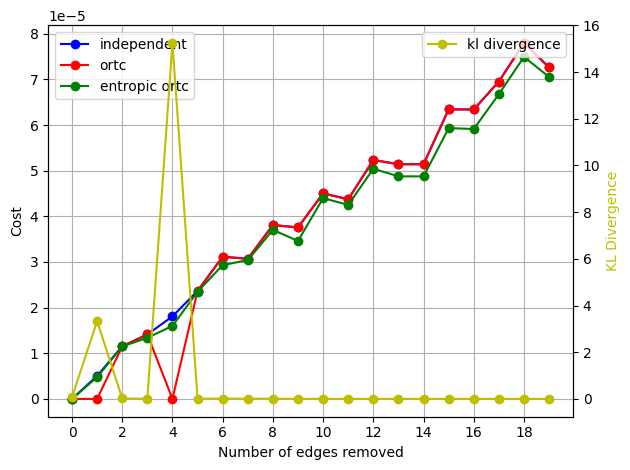

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure and axis objects
fig, ax1 = plt.subplots()

# Plotting independent, ortc, and entropic ortc costs on the primary y-axis
ax1.plot(independent_cost_list, marker='o', linestyle='-', color='b', label='independent')
ax1.plot(ortc_cost_list, marker='o', linestyle='-', color='r', label='ortc')
ax1.plot(entropic_ortc_cost_list, marker='o', linestyle='-', color='g', label='entropic ortc')

# Label for primary y-axis
ax1.set_xlabel('Number of edges removed')
ax1.set_ylabel('Cost', color='black')

# Set xticks
ax1.set_xticks(np.arange(0, 21, 2))

# Add grid and legend for the first axis
ax1.grid(True)
ax1.legend(loc='upper left')

# Create a secondary y-axis for the KL divergence
ax2 = ax1.twinx()

# Plotting kl_divergence on the secondary y-axis
ax2.plot(kl_divergence, marker='o', linestyle='-', color='y', label='kl divergence')

# Label for secondary y-axis
ax2.set_ylabel('KL Divergence', color='y')

# Add legend for the second axis
ax2.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()

In [8]:
kl_divergence

[0.07287136813115709,
 3.332493656439155,
 0.018691888567436334,
 0.010251185284925668,
 15.244655462766229,
 0.005818678458237289,
 0.014090101445831539,
 0.006630093005721571,
 0.010456369007227437,
 0.00210124506927616,
 0.004589536850519587,
 0.0003037685769306831,
 0.0010615354563915653,
 0.0004355711147336531,
 0.0005277692009419237,
 1.996953447585937e-16,
 8.172682930932542e-05,
 0.000144632333527914,
 -2.02032979477405e-16,
 1.6263748020466945e-16]